In [164]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

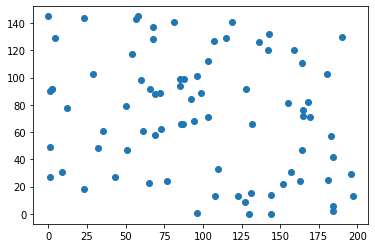

In [165]:
data = [(random.randint(0,200),random.randint(0,150)) for i in range(80)]
plt.scatter([d[0] for d in data],[d[1] for d in data])

In [166]:
def print_cluster(data,mean):
    print(mean)
    print()
    for i in range(len(mean)):
        print(f'({mean[i][0]},{mean[i][1]}) ',end=" : ")
        temp = [d for d in data if d[2]==i]
        for j in range(len(temp)):
            print(f'{temp[j][0],temp[j][1]}',end=", ")
        print()
    print('---------------------------------------------------------------------')
    print()
    print()

In [167]:
def manhattan_dis(p1,p2):
    return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])

In [168]:
def difference(mean1,mean2):
    for i in range(len(mean1)):
        if abs(mean1[i][0]-mean2[i][0])>0.001 or abs(mean1[i][1]-mean2[i][1])>0.0000001 :
            return False
    
    return True

In [169]:
def modify_data(data,mean,k):
    modified_data = []
    for d in data:
        temp = [manhattan_dis(d,mean[i]) for i in range(k)]
        indx = 0
        for j in range(len(temp)):
            if temp[j]<temp[indx]:
                indx = j
        modified_data.append((d[0],d[1],indx))
    return modified_data

In [170]:
def cluster(data,mean,k):
    
    while True:
        new_mean = []
        for i in range(k):
            temp = [d for d in data if d[2]==i]
            x = sum([d[0] for d in temp])/len(temp)
            y = sum([d[1] for d in temp])/len(temp)
            new_mean.append((x,y))
        if(difference(new_mean,mean)):
            mean = new_mean
            data = modify_data(data,mean,k)
            print_cluster(data,mean)
            break
        mean = new_mean
        data = modify_data(data,mean,k)
        print_cluster(data,mean)
    
    
    
    
    return mean,data

In [171]:
def kmean_clustering(data,k=2):
    means = []
    i = 0
    while i<k:
        choice = random.choice(data)
        if len(means)==0 or choice not in means:
            means.append(choice)
            i+=1
#     print(means)
    modified_data = modify_data(data,means,k)
#     for d in data:
#         temp = [manhattan_dis(d,means[i]) for i in range(k)]
#         indx = 0
#         for j in range(len(temp)):
#             if temp[j]<temp[indx]:
#                 indx = j
#         modified_data.append((d[0],d[1],indx))
    #print(modified_data)
    print_cluster(modified_data,means)
    means,data = cluster(modified_data,means,k)
    #print(means)
    return means,data

In [178]:
m,data = kmean_clustering(data,k=5)




[(69, 58, 8), (29, 103, 2), (128, 92, 1), (164, 111, 1), (144, 14, 5)]

(69,58)  : (65, 23), (86, 66), (32, 48), (61, 61), (50, 79), (35, 61), (23, 18), (69, 88), (51, 47), (43, 27), (69, 58), (77, 24), (9, 31), (94, 68), (73, 62), (66, 92), (1, 27), (1, 49), (87, 66), (72, 89), 
(29,103)  : (81, 141), (68, 128), (23, 144), (2, 92), (1, 90), (60, 98), (2, 92), (12, 78), (57, 143), (58, 145), (4, 129), (54, 117), (29, 103), (68, 137), (0, 145), 
(128,92)  : (132, 66), (99, 89), (128, 92), (92, 84), (155, 81), (115, 129), (103, 112), (96, 101), (107, 127), (85, 99), (119, 141), (88, 99), (136, 126), (85, 94), (103, 71), 
(164,111)  : (165, 76), (169, 71), (165, 72), (164, 111), (143, 132), (142, 120), (168, 82), (159, 120), (190, 130), (183, 57), (180, 103), 
(144,14)  : (181, 25), (163, 24), (152, 22), (144, 0), (184, 6), (197, 13), (110, 33), (164, 47), (96, 1), (144, 14), (184, 2), (108, 13), (130, 0), (131, 15), (196, 29), (127, 9), (184, 42), (157, 31), (123, 13), 
-----------------

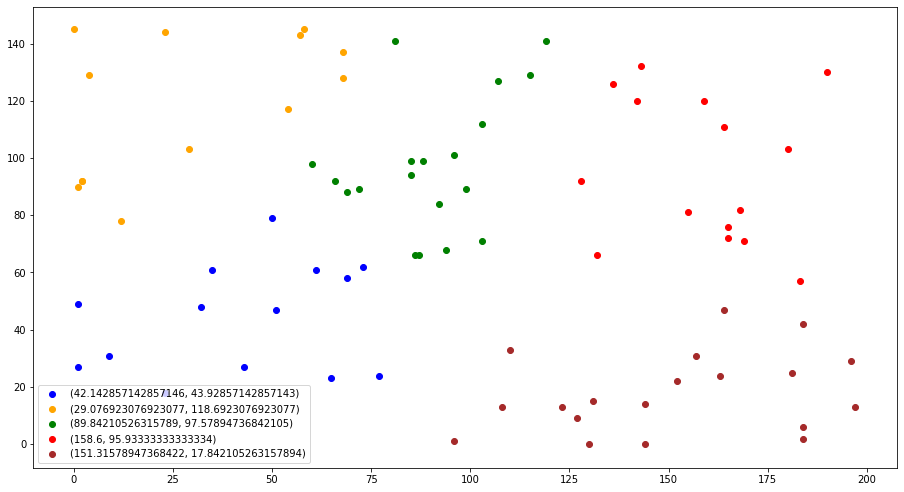

In [179]:
color = ['blue','orange','green','red','brown','grey','olive','cyan','navy','yellow']
#predicting clusters for new input
fig= plt.figure(figsize=(15,8))
axes= fig.add_axes([0.4,0.4,.8,.8])
for i in range(len(m)):
    temp = [d for d in data if d[2]==i]
    axes.scatter([d[0] for d in temp],[d[1] for d in temp],color=color[i%len(color)],label=str(m[i]))
plt.legend()